In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
sns.set_theme(style="ticks", color_codes=True)
from tqdm.notebook import tqdm, trange
import time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
main_201805 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201805.csv')
main_201806 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201806.csv')
main_201807 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201807.csv')
main_201808 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201808.csv')
main_201809 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201809.csv')
main_201810 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201810.csv')
main_201811 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201811.csv')
main_201812 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201812.csv')
main_201801 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201801.csv')
main_201802 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201802.csv')
main_201803 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201803.csv')
main_201804 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201804.csv')

In [3]:
main_201905 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201905.csv')
main_201906 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201906.csv')
main_201907 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201907.csv')
main_201908 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201908.csv')
main_201909 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201909.csv')
main_201910 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201910.csv')
main_201911 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201911.csv')
main_201912 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201912.csv')
main_201901 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201901.csv')
main_201902 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201902.csv')
main_201903 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201903.csv')
main_201904 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201904.csv')

# Initial Processing

In [4]:
all_data = [main_201801,main_201802,main_201803,main_201804,main_201805,
             main_201806,main_201807,main_201808,main_201809,main_201810,main_201811,main_201812,\
           main_201901,main_201902,main_201903,main_201904,main_201905,
             main_201906,main_201907,main_201908,main_201909,main_201910,main_201911,main_201912]

In [5]:
#Get rid of the [出站] column

cleaned_all_data = []

for data in all_data:
    cleaned_all_data.append(data.groupby(['日期','時段','進站']).sum().reset_index())

full_year_data = pd.concat(cleaned_all_data)
full_year_data['日期'] = pd.to_datetime(full_year_data['日期'])

In [6]:
full_year_data.rename(columns = {'日期': 'Date', '時段': 'Hour', '進站':'Station','人次':'CrowdFlow'}, inplace = True)
full_year_data = full_year_data.reset_index().drop(['index'],axis=1)
full_year_data

,Date,Hour,Station,CrowdFlow
0,2018-01-01,0,BL板橋,332
1,2018-01-01,0,七張,38
2,2018-01-01,0,三和國中,30
3,2018-01-01,0,三民高中,18
4,2018-01-01,0,三重,204
...,...,...,...,...
1656283,2020-01-01,5,頂埔,40
1656284,2020-01-01,5,頂溪,268
1656285,2020-01-01,5,頭前庄,21
1656286,2020-01-01,5,麟光,15


# EDA

In [7]:
ppl_every_day = full_year_data.groupby(['Date']).sum().reset_index().drop(['Hour'],axis=1)
ppl_every_day

,Date,CrowdFlow
0,2018-01-01,1716811
1,2018-01-02,2143920
2,2018-01-03,2170179
3,2018-01-04,2179256
4,2018-01-05,2388112
...,...,...
726,2019-12-28,2296395
727,2019-12-29,1775710
728,2019-12-30,2467977
729,2019-12-31,3058226


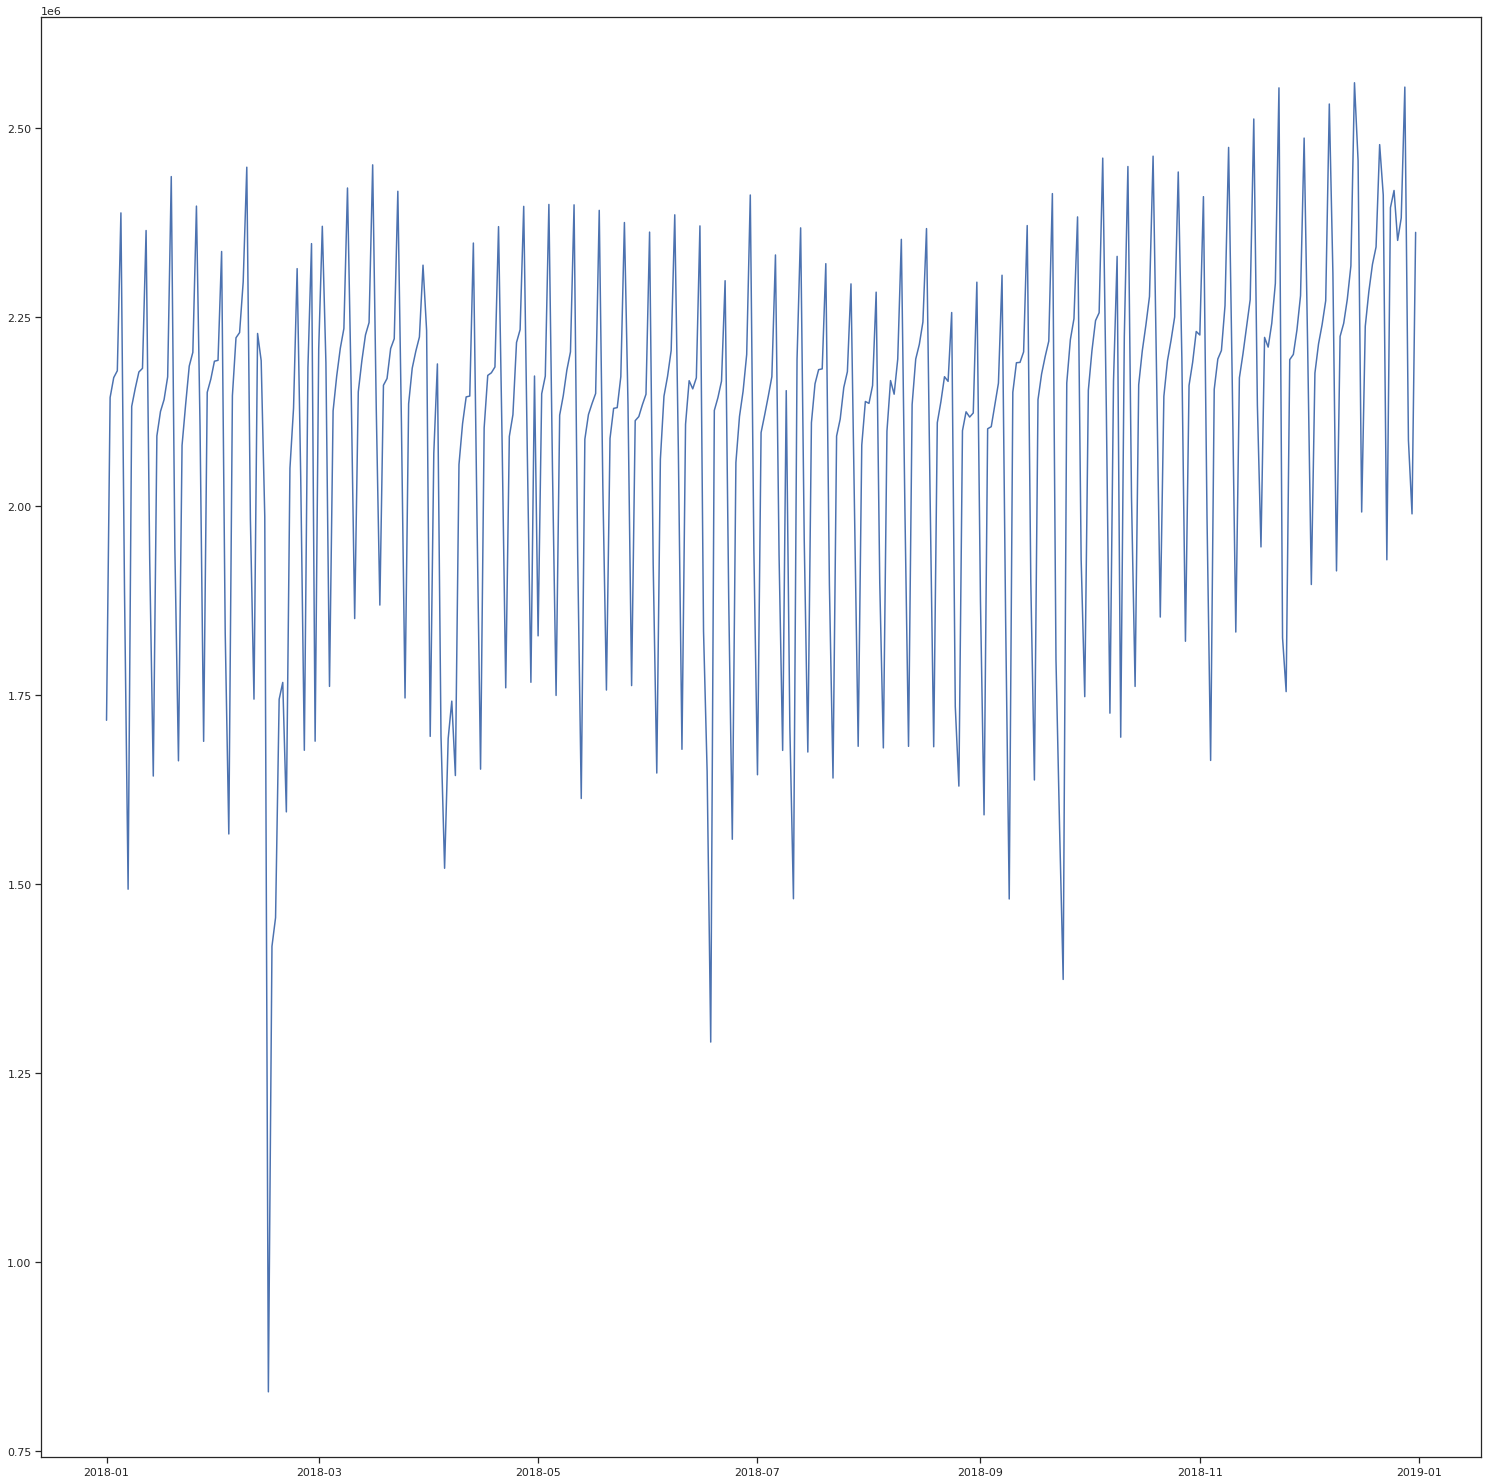

In [8]:
#2018 crowd flow

ppl_every_day = full_year_data.groupby(['Date']).sum().reset_index().drop(['Hour'],axis=1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(ppl_every_day['Date'][:365], ppl_every_day['CrowdFlow'][:365])
plt.show()

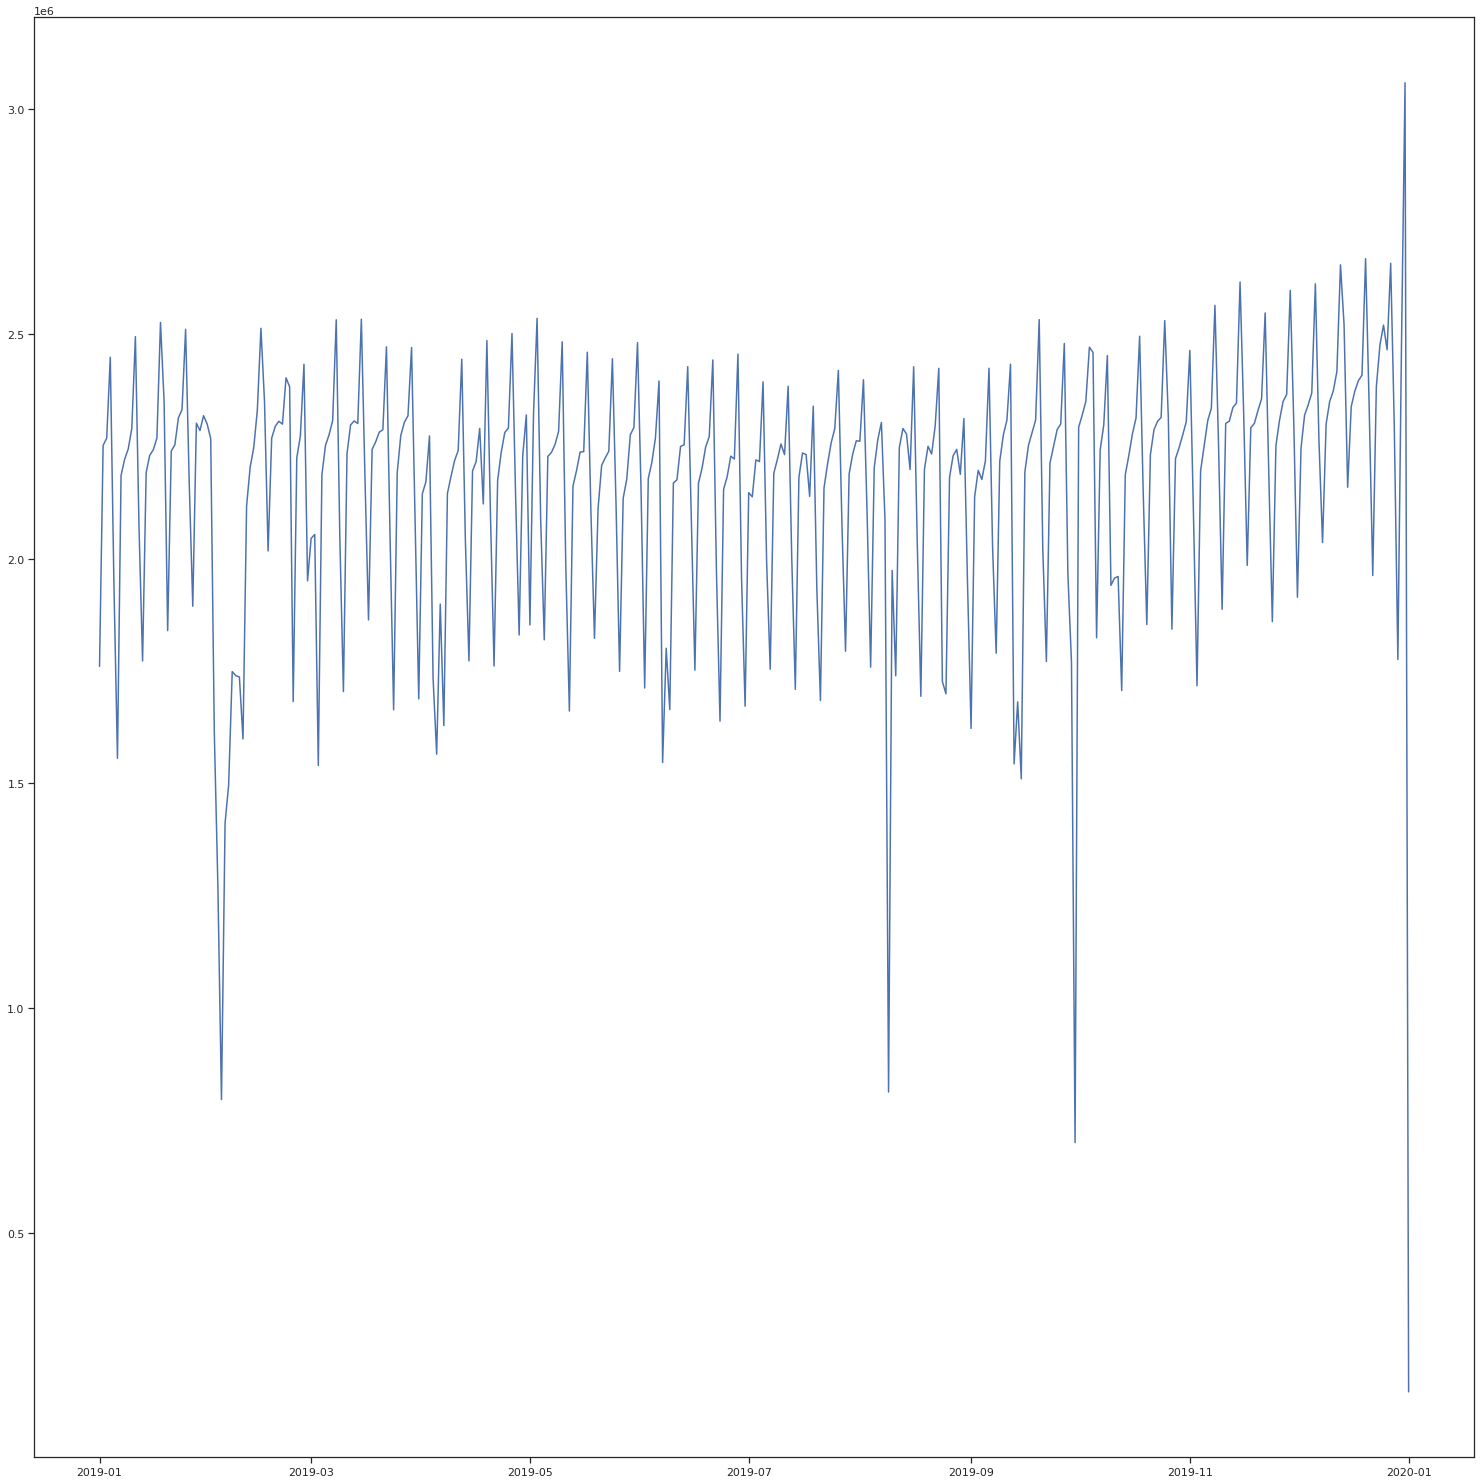

In [9]:
#2019 crowd flow

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(ppl_every_day['Date'][365:], ppl_every_day['CrowdFlow'][365:])
plt.show()

In [10]:
#Delete anomalies

full_year_data = full_year_data[full_year_data.Date != '2019-08-09']
full_year_data = full_year_data[full_year_data.Date != '2019-09-30']
full_year_data = full_year_data[full_year_data.Date != '2020-01-01']

In [11]:
ppl_every_day.describe()

,CrowdFlow
count,7.310000e+02
mean,2.125546e+06
std,2.778685e+05
min,1.470910e+05
25%,2.026038e+06
50%,2.187409e+06
75%,2.289948e+06
max,3.058226e+06


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_

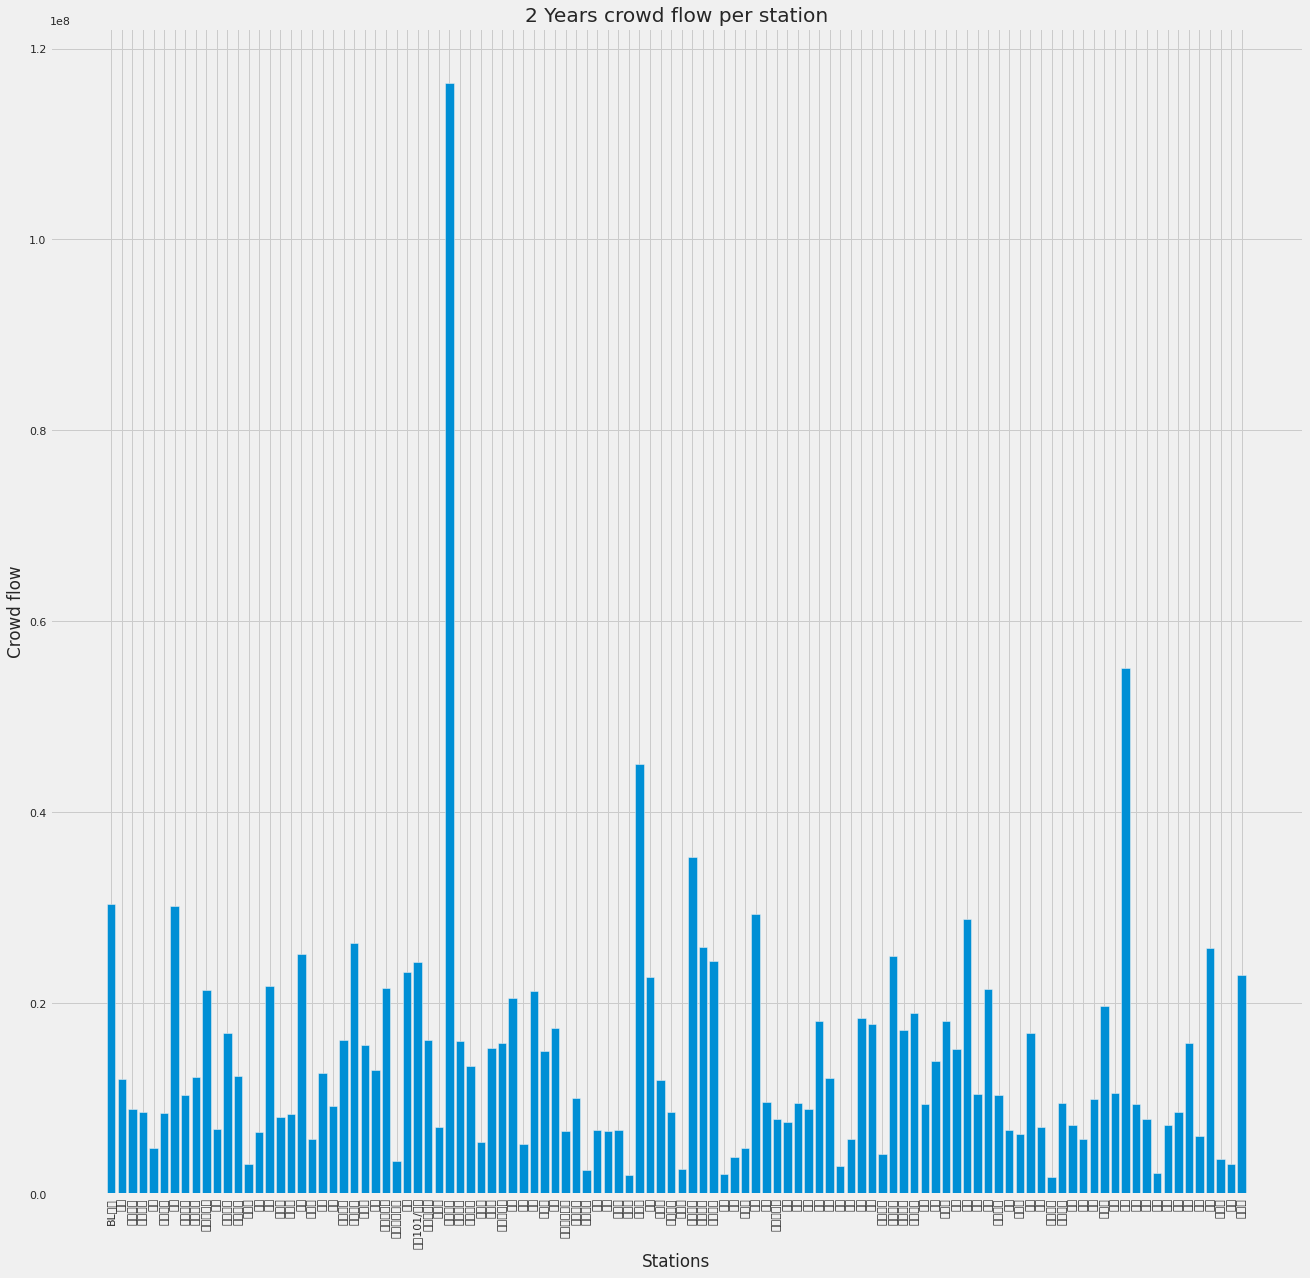

In [12]:
ppl_per_station = full_year_data.groupby(['Station']).sum().reset_index().drop(['Hour'],axis=1)
flow = ppl_per_station['CrowdFlow'].tolist()

%matplotlib inline
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(20,20)) # set the size that you'd like (width, height)
x_values = list(range(len(flow)))
plt.bar(x_values, flow, orientation = 'vertical')
station_list = ppl_per_station['Station'].tolist()
plt.xticks(x_values, station_list, rotation='vertical')
plt.ylabel('Crowd flow'); plt.xlabel('Stations'); plt.title('2 Years crowd flow per station');

In [13]:
station_ranking = ppl_per_station.sort_values(by=['CrowdFlow'],ascending=False)
station_ranking = station_ranking.reset_index().drop(['index'],axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(station_ranking)

      Station  CrowdFlow
0        台北車站  116369319
1          西門   55091375
2         市政府   45022980
3        忠孝復興   35262249
4        BL板橋   30409519
5          中山   30174690
6          新埔   29386156
7          淡水   28824920
8        南京復興   26314772
9        忠孝敦化   25879720
10         頂溪   25796878
11         劍潭   25144055
12       松江南京   24917440
13       忠孝新生   24376925
14   台北101/世貿   24283901
15         古亭   23212924
16        龍山寺   22956540
17         府中   22724213
18         公館   21777525
19      南港展覽館   21596997
20         石牌   21528442
21      中正紀念堂   21378282
22         士林   21250196
23         圓山   20581982
24        行天宮   19692017
25       永安市場   18975006
26         東門   18417796
27         景安   18137496
28        江子翠   18086984
29         松山   17835828
30         大安   17433926
31       民權西路   17166912
32         芝山   16907985
33       亞東醫院   16900104
34      台北小巨蛋   16140900
35       南京三民   16132938
36       台大醫院   16068347
37         雙連   15840871
38      國父紀念館   15822333


# Feature Engineering

In [14]:
full_year_data['DayofWeek'] = full_year_data['Date'].dt.dayofweek + 1
full_year_data['Month'] = full_year_data['Date'].dt.month
full_year_data['Special'] = 1

In [15]:
full_year_data['Special'].loc[full_year_data['Date'] == '2018-05-01'] = 0 #勞動節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-06-16'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-06-17'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-06-18'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-09-22'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-09-23'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-09-24'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-10-10'] = 0 #國慶日
full_year_data['Special'].loc[full_year_data['Date'] == '2018-01-01'] = 0 #元旦
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-15'] = 0 #除夕
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-16'] = 0 #初一
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-17'] = 0 #回娘家
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-18'] = 0 #祭祖
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-19'] = 0 #迎神
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-20'] = 0 #開工
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-28'] = 0 #228
full_year_data['Special'].loc[full_year_data['Date'] == '2018-04-04'] = 0 #掃墓
full_year_data['Special'].loc[full_year_data['Date'] == '2018-04-05'] = 0 #掃墓
full_year_data['Special'].loc[full_year_data['Date'] == '2018-04-06'] = 0 #補假

full_year_data['Special'].loc[full_year_data['Date'] == '2018-03-31'] = 2 #清明連假補班
full_year_data['Special'].loc[full_year_data['Date'] == '2018-12-22'] = 2 #補班

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
full_year_data['Special'].loc[full_year_data['Date'] == '2019-05-01'] = 0 #勞動節
full_year_data['Special'].loc[full_year_data['Date'] == '2019-06-07'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2019-09-13'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2019-10-10'] = 0 #國慶日
full_year_data['Special'].loc[full_year_data['Date'] == '2019-10-11'] = 0 #國慶日
full_year_data['Special'].loc[full_year_data['Date'] == '2019-01-01'] = 0 #元旦
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-02'] = 0 #除夕
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-03'] = 0 #初一
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-04'] = 0 #回娘家
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-05'] = 0 #祭祖
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-06'] = 0 #迎神
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-07'] = 0 #開工
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-08'] = 0 #開工
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-28'] = 0 #228
full_year_data['Special'].loc[full_year_data['Date'] == '2019-04-04'] = 0 #掃墓
full_year_data['Special'].loc[full_year_data['Date'] == '2019-04-05'] = 0 #掃墓

full_year_data['Special'].loc[full_year_data['Date'] == '2019-10-05'] = 2 #補班
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-23'] = 2 #補班

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
tidy_full_data = full_year_data
tidy_full_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month,Special
0,2018-01-01,0,BL板橋,332,1,1,0
1,2018-01-01,0,七張,38,1,1,0
2,2018-01-01,0,三和國中,30,1,1,0
3,2018-01-01,0,三民高中,18,1,1,0
4,2018-01-01,0,三重,204,1,1,0
...,...,...,...,...,...,...,...
1655851,2019-12-31,23,頂埔,259,2,12,1
1655852,2019-12-31,23,頂溪,1219,2,12,1
1655853,2019-12-31,23,頭前庄,189,2,12,1
1655854,2019-12-31,23,麟光,130,2,12,1


# Split Data

We split the data first because we're going to engineer Station column based on existing data only since there could be new sations in the future.

In [18]:
train_size = int(len(tidy_full_data) * 0.6)
validation_size = int(len(tidy_full_data) * 0.2)
test_size = int(len(tidy_full_data) * 0.2)

train_data = tidy_full_data[0:train_size]
val_data = tidy_full_data[train_size:(train_size+validation_size)]
test_data = tidy_full_data[(train_size+validation_size):len(tidy_full_data)]

# Engineer [Station] based on train data

In [19]:
ppl_per_station = train_data.groupby(['Station']).sum().reset_index().drop(['Hour'],axis=1)
station_ranking = ppl_per_station.sort_values(by=['CrowdFlow'],ascending=False)
station_ranking = station_ranking.drop(['DayofWeek','Month','Special'],axis=1).reset_index().drop(['index'],axis=1)

di = station_ranking.set_index('Station').to_dict()['CrowdFlow']

for k, v in di.items():
    di[k] = round(v/439)

In [20]:
#len(train_data.groupby(['Date']))

In [21]:
train_data = train_data.replace({"Station": di})
train_data = train_data.drop(['Date'],axis=1)

test_data = test_data.replace({"Station": di})
test_data = test_data.drop(['Date'],axis=1)

val_data = val_data.replace({"Station": di})
val_data = val_data.drop(['Date'],axis=1)
train_data

,Hour,Station,CrowdFlow,DayofWeek,Month,Special
0,0,40652,332,1,1,0
1,0,16064,38,1,1,0
2,0,11927,30,1,1,0
3,0,11771,18,1,1,0
4,0,6224,204,1,1,0
...,...,...,...,...,...,...
990787,18,8072,1051,3,3,1
990788,18,34809,2257,3,3,1
990789,18,4898,633,3,3,1
990790,18,4219,282,3,3,1


1. 因為我是用Random Forest，所以不需要做feature scaling

# Modeling

In [22]:
X_train = train_data.drop(['CrowdFlow'],axis=1)
y_train = train_data['CrowdFlow']
X_test = test_data.drop(['CrowdFlow'],axis=1)
y_test = test_data['CrowdFlow']
X_val = val_data.drop(['CrowdFlow'],axis=1)
y_val = val_data['CrowdFlow']
    

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(n_estimators = 100, min_samples_split=10,random_state = 0)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [23]:
predictions = rforest.predict(X_val)

#R Square
import statsmodels.api as sm
X_addC = sm.add_constant(predictions)
result = sm.OLS(y_val, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.9863996193047999 0.98639957812422


In [24]:
#RMSE
from sklearn.metrics import mean_squared_error
import math
#First model
print(mean_squared_error(y_val, predictions))
print(math.sqrt(mean_squared_error(y_val, predictions)))

25765.345073401775
160.51587171803845


In [28]:
base_train_y = np.full((330264,), y_train.sum()/990792)
print(mean_squared_error(y_val, base_train_y))
print(math.sqrt(mean_squared_error(y_val, base_train_y)))

1705296.5607162544
1305.8700397498421


RMSE comparison:
1. 100 trees: 146
2. 200 trees: 146

# Interpreting

In [29]:
true_data = pd.DataFrame(data = y_val)

predictions_data = pd.DataFrame(data = predictions)

combined = predictions_data
combined['Actual'] = true_data[0]
combined.rename(columns = {0: 'Predicted'}, inplace = True)
random_combined = combined.sample(n=250, random_state=1)
random_combined.head(20)

,Predicted,Actual
285168,424.713483,445
171674,482.965330,632
2515,334.102244,368
103882,1513.932589,1716
35258,1615.254765,1852
126842,5485.403452,5754
115311,1207.182118,1221
63005,816.199765,777
322436,4290.426395,4046
180294,495.493834,551


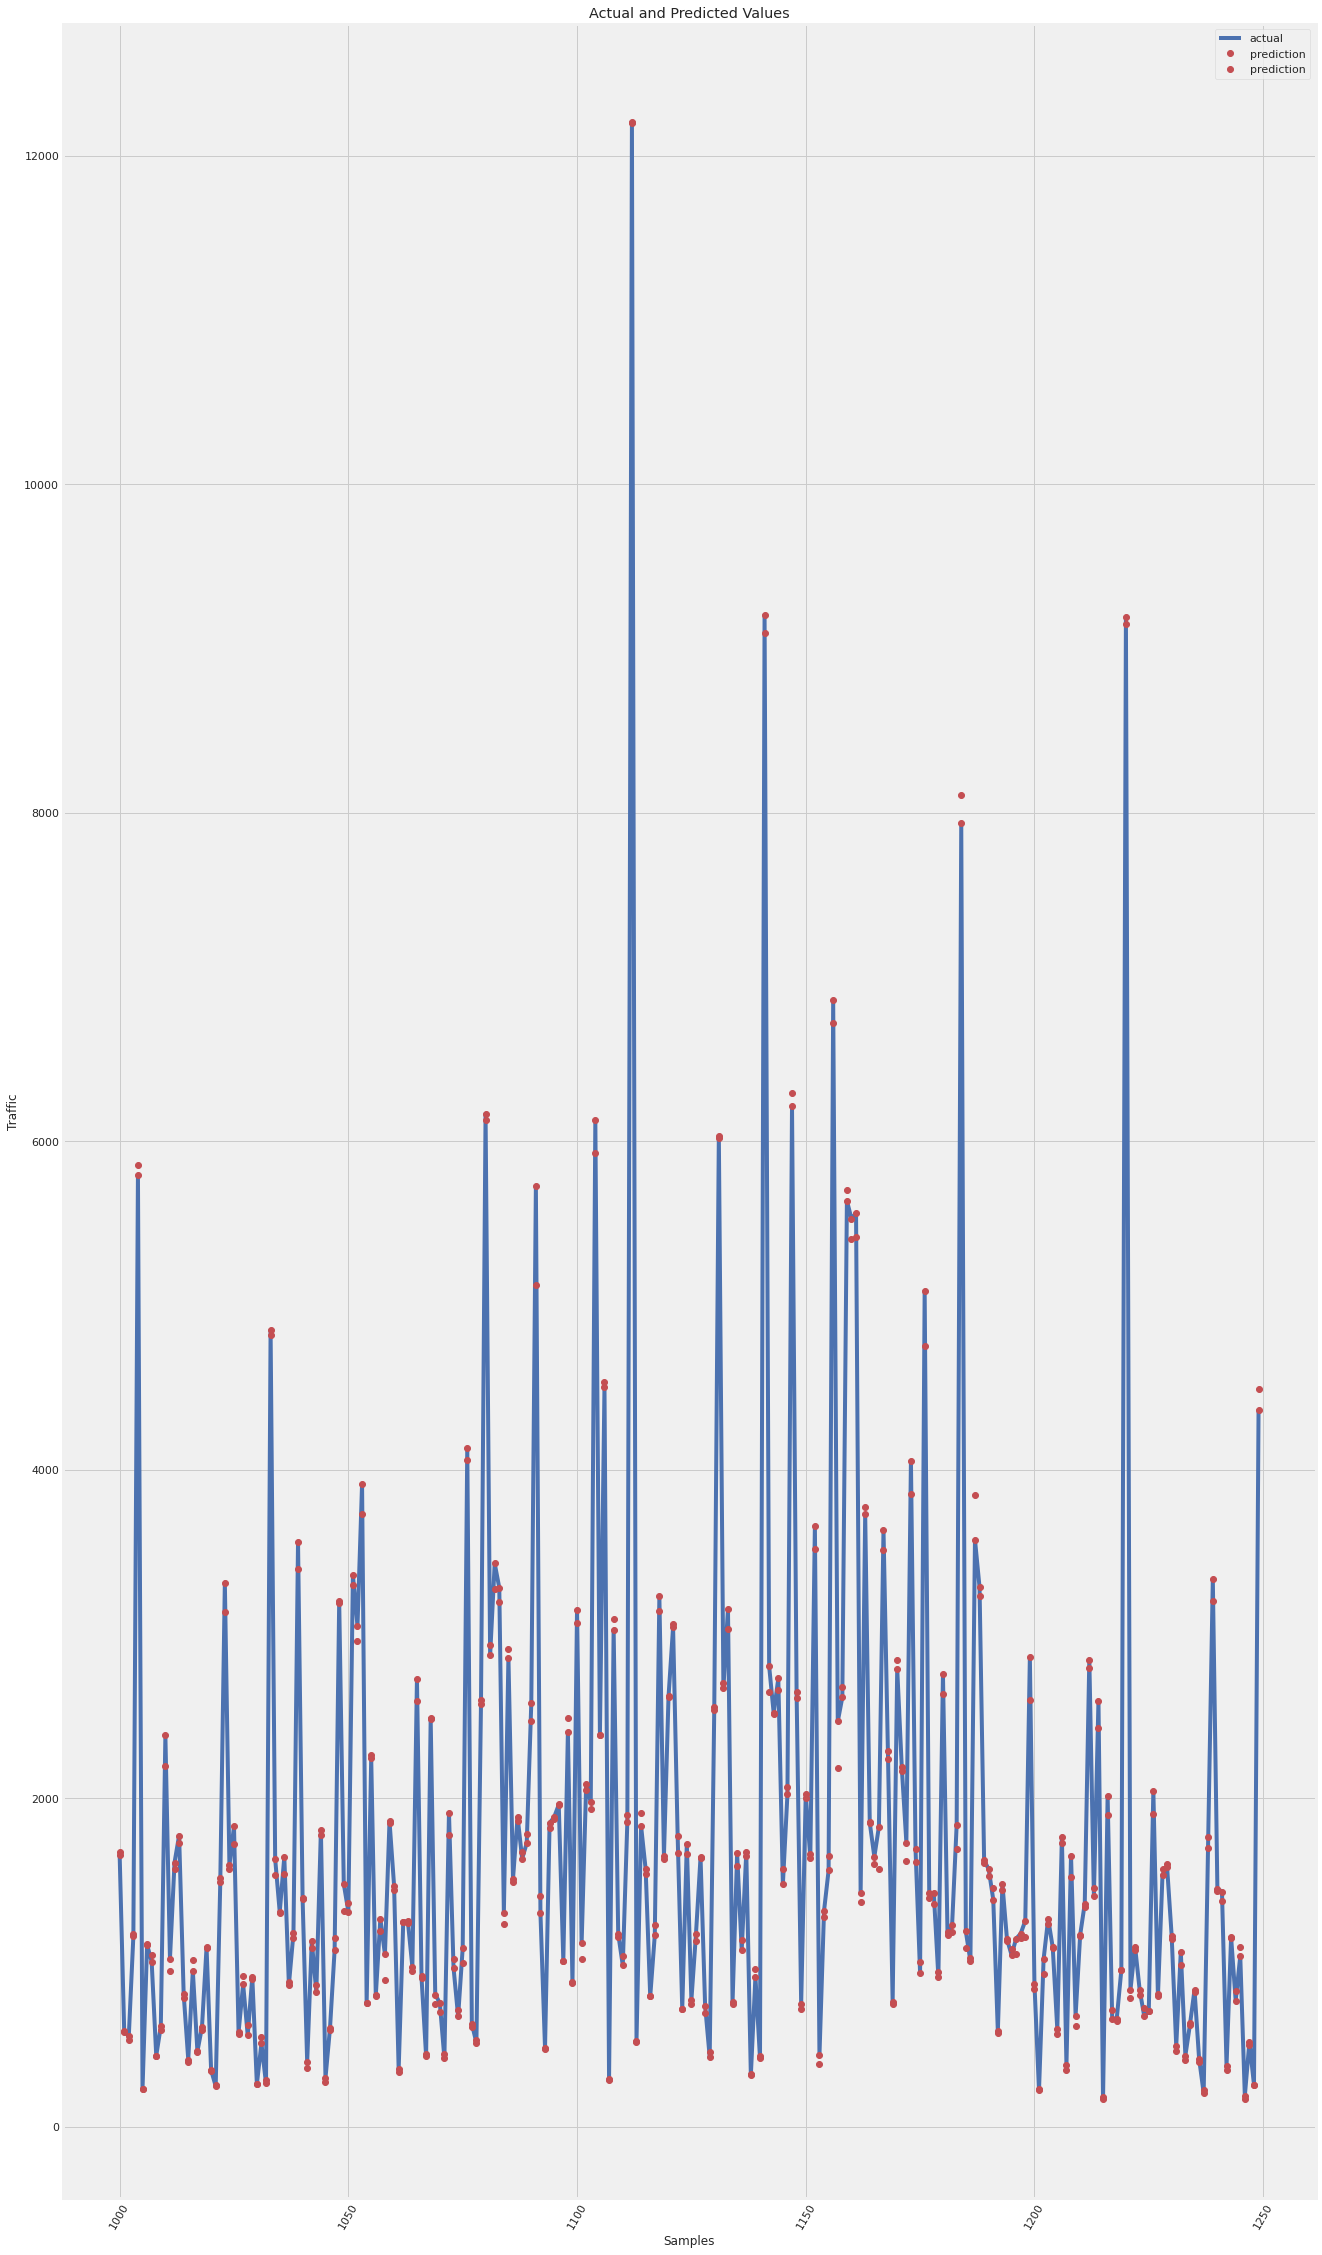

In [30]:
%matplotlib inline

f, ax = plt.subplots(figsize=(20,40)) # set the size that you'd like: width, height

# Plot the actual values
plt.plot(true_data[1000:1250], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data[1000:1250], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Samples'); plt.ylabel('Traffic'); plt.title('Actual and Predicted Values');